In [1]:
import requests


In [3]:
url = "https://api.polygon.io/v2/aggs/ticker/AAPL/range/1/minute/2021-07-01/2021-07-31?adjusted=true&sort=asc&limit=50000&apiKey=S3YJuHDlVx5GN0WoYDOSt3utUTciImkl"
resp = requests.get(url)
print(resp)

<Response [200]>


In [ ]:
print(resp.json()['results'])

In [5]:
import pandas as pd
df = pd.DataFrame(resp.json()['results'])
print(df)

            v        vw       o       c       h       l              t    n
0       590.0  137.2763  137.27  137.28  137.28  137.27  1625126400000   68
1      1109.0  137.2758  137.28  137.27  137.28  137.27  1625126460000   14
2       514.0  137.3273  137.35  137.35  137.35  137.35  1625126640000   19
3      3401.0  137.3331  137.35  137.35  137.35  137.35  1625126700000  121
4       587.0  137.3003  137.32  137.32  137.32  137.32  1625126760000   19
...       ...       ...     ...     ...     ...     ...            ...  ...
17451   809.0  145.8912  145.89  145.90  145.90  145.89  1627689180000    9
17452   208.0  145.8777  145.87  145.87  145.87  145.87  1627689360000    8
17453   238.0  145.9335  145.94  145.94  145.94  145.94  1627689420000   14
17454  1254.0  145.9461  145.95  145.95  145.95  145.95  1627689480000   11
17455   846.0  145.9554  145.97  145.95  145.97  145.95  1627689540000   13

[17456 rows x 8 columns]


In [ ]:
import datetime
list_date = []
list_price = []
for i in resp.json()['results']:
    list_date.append(datetime.datetime.fromtimestamp(i['t']/1000.0))
    list_price.append(i['o'])
print(list_price)

In [7]:
import pandas as pd


In [8]:
df = pd.DataFrame({'date' : list_date, 'price' : list_price})
print(df)

                     date   price
0     2021-07-01 14:00:00  137.27
1     2021-07-01 14:01:00  137.28
2     2021-07-01 14:04:00  137.35
3     2021-07-01 14:05:00  137.35
4     2021-07-01 14:06:00  137.32
...                   ...     ...
17451 2021-07-31 05:53:00  145.89
17452 2021-07-31 05:56:00  145.87
17453 2021-07-31 05:57:00  145.94
17454 2021-07-31 05:58:00  145.95
17455 2021-07-31 05:59:00  145.97

[17456 rows x 2 columns]


<AxesSubplot: xlabel='date'>

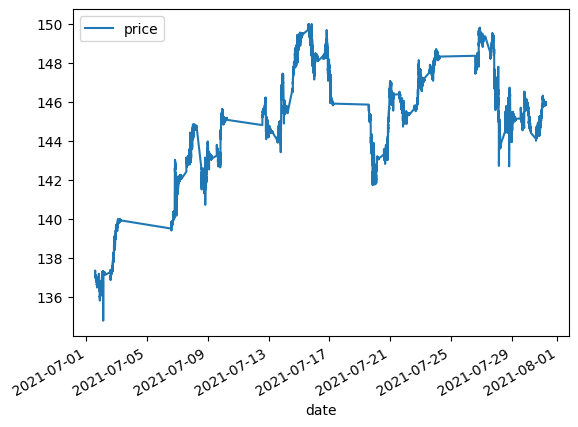

In [9]:
df.plot(x = 'date', y = 'price')